In [34]:
import tensorflow as tf
import numpy as np

In [35]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\nandh\OneDrive\Desktop\Medical image analaysis\DATASETS\brain_tumor_dataset")


#validation is split the dataset into train 0.2 is 20% of dataset
dftrain=tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\nandh\OneDrive\Desktop\Medical image analaysis\DATASETS\brain_tumor_dataset",validation_split=0.2,subset="training",seed=123)

dftest=tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\nandh\OneDrive\Desktop\Medical image analaysis\DATASETS\brain_tumor_dataset",validation_split=0.2,subset="validation",seed=123)

Found 253 files belonging to 2 classes.
Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [36]:
"""train_size=int(len(dataset)*.8)
val_size=int(len(dataset)*.2)
test_size=int(len(dataset)*.1)
len(train_size)
len(val_size)
len(test_size)"""
#find batch size

#len(dataset)


train_size=int(len(dataset)*.8)
val_size=int(len(dataset)*.2)
test_size=int(len(dataset)*.1)+1



In [37]:
#train_size
#val_size

#test_size

train_size+val_size+test_size

8

In [38]:
train=dataset.take(train_size)
val=dataset.skip(train_size).take(val_size)
test=dataset.skip(train_size+val_size).take(test_size)

In [39]:
#split the dataset for memory efficency and speed the cpu
batch_size=32

dataset_name=dataset

#class are yes Or No
class_name=dataset.class_names

print(class_name)

['no', 'yes']


In [40]:
size=(512,512)
dftrain=dftrain.map(lambda image,label1: (tf.image.resize(image,size),label1))
dftest=dftest.map(lambda image,label1: (tf.image.resize(image,size),label1))

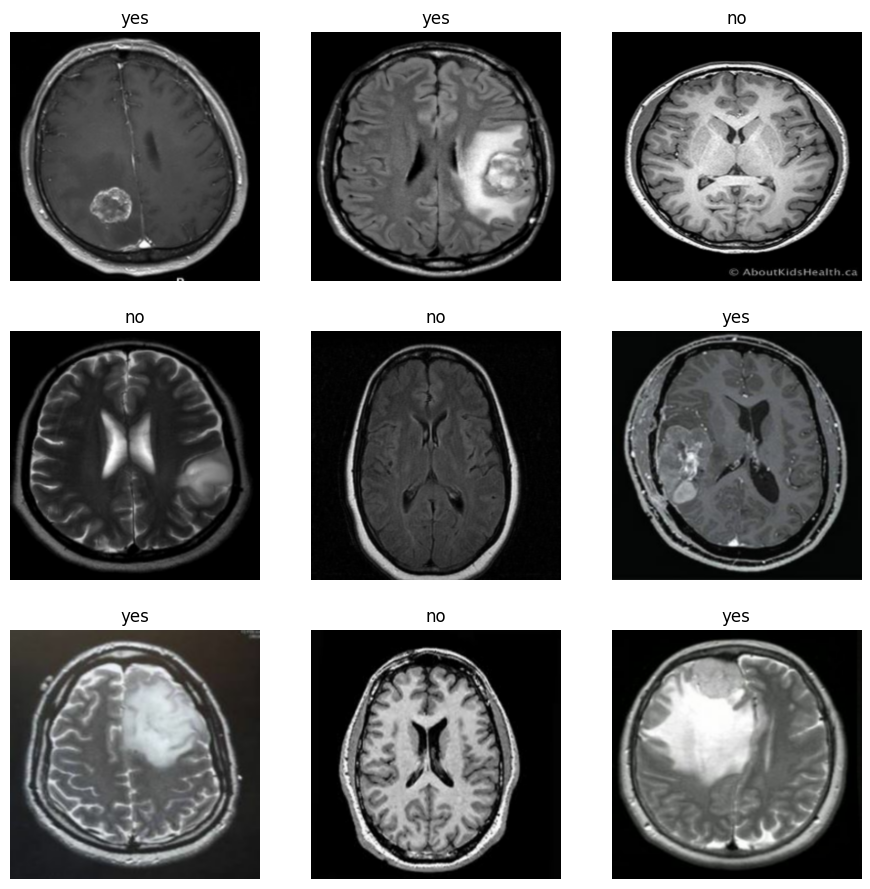

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,11))
for images, labels2 in dftrain.take(2):
    for i in range(9):
        #subplot are space fetch 3x3 size
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))#image encoding uint8 0 represent black and 255 represent white
        plt.title(class_name[labels2[i]])
        plt.axis("OFF")

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


#if image are in diffrent angles,size,zoom,translate make into single format 
image=Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2,0.3),width_factor=(-0.2,-0.3),interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1,width_factor=0.1)
    ],
    name="image"
)


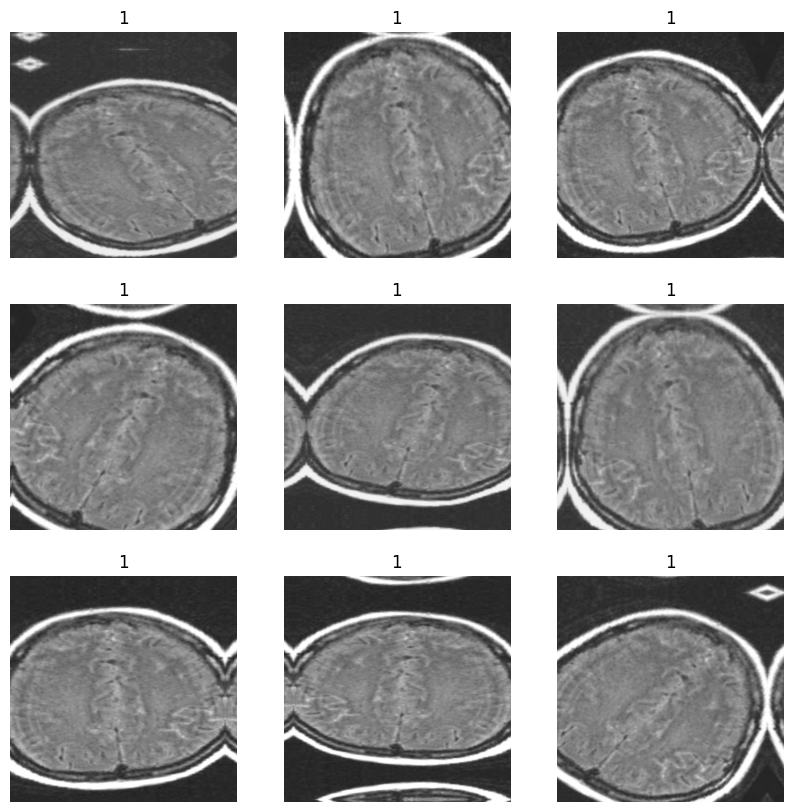

In [43]:
for images,labels in dftrain.take(1):
    plt.figure(figsize=(10,10))
    first_image=images[0]
    
    def f(x):
        return int(x)
    
    f2=np.vectorize(f)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        augmented_image=image(tf.expand_dims(first_image,0),training=True)
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(f2(labels[0]))
        plt.axis("OFF")

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

model=Sequential()
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
#tf._optimizers.Adam


#have to work on deep


In [46]:
model.compile('adam', loss=tf._losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
hist=model.fit(train, epochs=20,validation_data= val)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.5065 - loss: 272.4146 - val_accuracy: 0.7812 - val_loss: 52.6417
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7339 - loss: 44.9067 - val_accuracy: 0.5625 - val_loss: 24.4695
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7165 - loss: 13.5225 - val_accuracy: 0.8125 - val_loss: 2.9752
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.7737 - loss: 4.6261 - val_accuracy: 0.8438 - val_loss: 0.8117
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7511 - loss: 1.1860 - val_accuracy: 0.8438 - val_loss: 0.3883
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7835 - loss: 0.4642 - val_accuracy: 0.8438 - val_loss: 0.3928
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8611 - loss: 0.3846 - val_accuracy: 0.7812 - val_loss: 0.5145
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7810 - loss: 0.4198 - val_accuracy: 0.8750 - val

In [49]:
# accuracy and loos info  ==> hist.history

<function matplotlib.pyplot.show(close=None, block=None)>

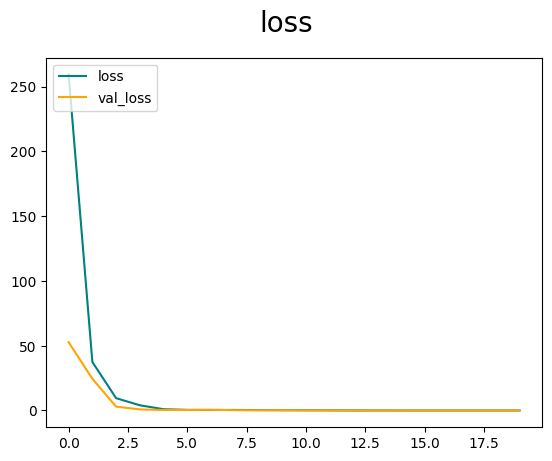

In [50]:
fig= plt.figure()

plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show


#blue line is not dcreased then its not learning

<function matplotlib.pyplot.show(close=None, block=None)>

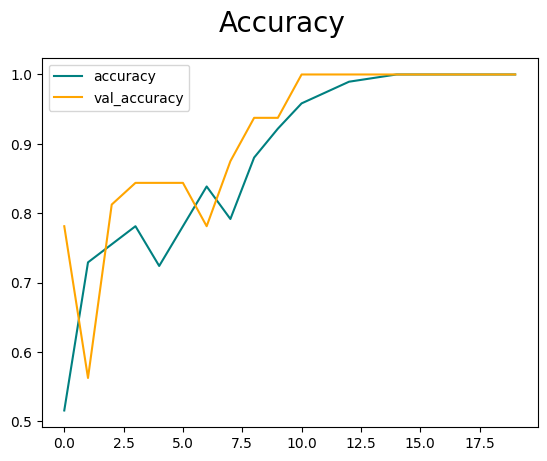

In [51]:
fig= plt.figure()

plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show

In [52]:



from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [53]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
    X,y=batch
    ypred=model.predict(X)
    pre.update_state(y,ypred)
    re.update_state(y,ypred)
    acc.update_state(y,ypred)
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [55]:
print(f'precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

precision:1.0,Recall:1.0,Accuracy:1.0


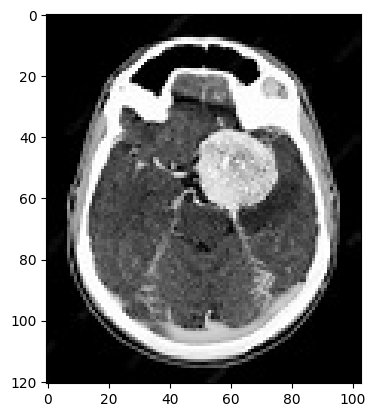

In [67]:
#testing

import cv2


img=cv2.imread(r"C:\Users\nandh\Downloads\th (9).jpeg")
plt.imshow(img)
plt.show()

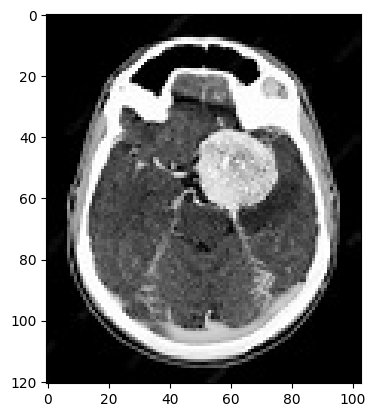

In [68]:
resize=tf.image.resize(img, (256,256))
plt.imshow(img)

plt.show()

In [69]:
#resize.shape(256,256,3)
np.expand_dims(resize/255,0).shape

(1, 256, 256, 3)

In [70]:
ypred=model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [71]:
ypred

array([[0.50182575]], dtype=float32)

In [72]:
if ypred > 0.5:
    print(f'Brain tumor')
else:
    print(f'No Brain tumor')

Brain tumor


In [62]:
"""from tensorflow.keras.models import load_model
import os
import pickle

model.save(os.path.join('model','braintumorprdection.h5'))

new_model=load_model(os.path.join('model','braintumorprdection.h5'))
ypred=new_model.predict(np.expand_dims(resize/255,0))

if ypred > 0.5:
    print(f'Brain tumor')
else:
    print(f'No Brain tumor')
    """